In [3]:
from keras import models
from keras import layers
from keras.datasets import imdb
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Utility functions
def vectorize_sequences(sequences, dimension=10000):
    vectorized_sequences = np.zeros((len(sequences), dimension), dtype='float32')
    for i, sequence in enumerate(sequences, start=0):
        vectorized_sequences[i, sequence] = 1.
    return vectorized_sequences

In [5]:
# Loads and prepares data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Checks the maximum word index in training data
# print("Maximum word index in training data: ", max([np.max(seq) for seq in train_data]))

# Gets the review comment in English just for reference
# word_index_dict = imdb.get_word_index()
# reverse_word_index_dict = dict([(value, key) for (key, value) in word_index_dict.items()])
# reviewWords = [reverse_word_index_dict[word_index] for word_index in train_data[0]]

train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)

validation_data = train_data[15000:]
train_data = train_data[0:15000]

train_labels = train_labels.astype(dtype='float32')
# train_labels = np.asarray(train_labels).astype('float32')
test_labels = test_labels.astype(dtype='float32')
# test_labels = np.asarray(test_labels).astype('float32')

validation_labels = train_labels[15000:]
train_labels = train_labels[0:15000]

In [4]:
# Creates model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
# Trains model
history = model.fit(train_data, train_labels, batch_size=512, epochs=6, validation_data=(validation_data, validation_labels))
# history = model.fit(partial_train_data_vec, partial_train_label, batch_size=512, epochs=20)

Epoch 1/6
30/30 [==============================] - 2s 53ms/step - loss: 0.5249 - accuracy: 0.7878 - val_loss: 0.3939 - val_accuracy: 0.8663
Epoch 2/6
30/30 [==============================] - 1s 46ms/step - loss: 0.3167 - accuracy: 0.9035 - val_loss: 0.3139 - val_accuracy: 0.8852
Epoch 3/6
30/30 [==============================] - 2s 56ms/step - loss: 0.2341 - accuracy: 0.9257 - val_loss: 0.2809 - val_accuracy: 0.8922
Epoch 4/6
30/30 [==============================] - 1s 38ms/step - loss: 0.1814 - accuracy: 0.9425 - val_loss: 0.2712 - val_accuracy: 0.8924
Epoch 5/6
30/30 [==============================] - 1s 46ms/step - loss: 0.1456 - accuracy: 0.9529 - val_loss: 0.2795 - val_accuracy: 0.8891
Epoch 6/6
30/30 [==============================] - 2s 51ms/step - loss: 0.1195 - accuracy: 0.9633 - val_loss: 0.2973 - val_accuracy: 0.8849


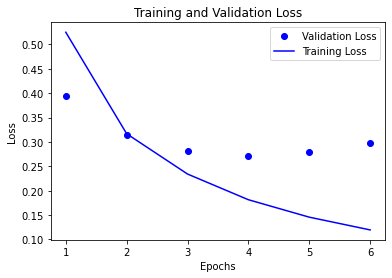

In [10]:
# Evaluates training and validation performance
history_dict = history.history

epochs = range(1, len(history_dict["accuracy"]) + 1)
validation_losses = history_dict["val_loss"]
training_losses = history_dict["loss"]

plt.plot(epochs, validation_losses, "bo", label="Validation Loss")
plt.plot(epochs, training_losses, "b", label="Training Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

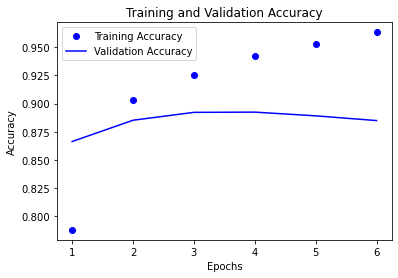

In [11]:
training_accuracies = history_dict["accuracy"]
validation_accuracies = history_dict["val_accuracy"]
plt.clf()
plt.plot(epochs, training_accuracies, 'bo', label="Training Accuracy")
plt.plot(epochs, validation_accuracies, 'b', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [12]:
# Evaluates testing performance
evaluation = model.evaluate(test_data, test_labels)
print("Model Performance on Test Data: Loss is ", evaluation[0], " and accuracy is ", evaluation[1])

782/782 [==============================] - 8s 11ms/step - loss: 0.3182 - accuracy: 0.8760
Model Performance on Test Data: Loss is  0.31817787885665894  and accuracy is  0.876039981842041


In [14]:
# Predicting reviews
model.predict(test_data)

array([[0.31456113],
       [0.9997572 ],
       [0.65845346],
       ...,
       [0.27495497],
       [0.05573681],
       [0.43068677]], dtype=float32)

# Now, Let's experiment considering this Neural Network model with 2 hiddent layers each with 16 hidden units with 'rmsprop' optimizer and 'relu' activation function as basedlined model.

## These experiments include (1) increasing and decreasing hidden layers, (2) increasing and decreasing hidden units, (3) using different loss function, and (4) using diffent activation function

In [4]:
### Increasing hidden layers to 3 from 2
# Creates model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, batch_size=512, epochs=6, validation_data=(validation_data, validation_labels))

Epoch 1/6
30/30 [==============================] - 2s 62ms/step - loss: 0.5313 - accuracy: 0.7813 - val_loss: 0.3851 - val_accuracy: 0.8747
Epoch 2/6
30/30 [==============================] - 2s 54ms/step - loss: 0.3067 - accuracy: 0.9009 - val_loss: 0.2958 - val_accuracy: 0.8890
Epoch 3/6
30/30 [==============================] - 2s 52ms/step - loss: 0.2096 - accuracy: 0.9294 - val_loss: 0.2775 - val_accuracy: 0.8913
Epoch 4/6
30/30 [==============================] - 2s 57ms/step - loss: 0.1660 - accuracy: 0.9435 - val_loss: 0.2857 - val_accuracy: 0.8881
Epoch 5/6
30/30 [==============================] - 2s 58ms/step - loss: 0.1339 - accuracy: 0.9558 - val_loss: 0.3409 - val_accuracy: 0.8751
Epoch 6/6
30/30 [==============================] - 2s 59ms/step - loss: 0.1069 - accuracy: 0.9662 - val_loss: 0.3179 - val_accuracy: 0.8840


In [4]:
### Decreasing hidden layers to 1 from 2
# Creates model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, batch_size=512, epochs=6, validation_data=(validation_data, validation_labels))

Epoch 1/6
30/30 [==============================] - 2s 55ms/step - loss: 0.5014 - accuracy: 0.8007 - val_loss: 0.4099 - val_accuracy: 0.8455
Epoch 2/6
30/30 [==============================] - 1s 48ms/step - loss: 0.3240 - accuracy: 0.8991 - val_loss: 0.3200 - val_accuracy: 0.8862
Epoch 3/6
30/30 [==============================] - 1s 48ms/step - loss: 0.2505 - accuracy: 0.9225 - val_loss: 0.2905 - val_accuracy: 0.8917
Epoch 4/6
30/30 [==============================] - 1s 48ms/step - loss: 0.2049 - accuracy: 0.9381 - val_loss: 0.3013 - val_accuracy: 0.8783
Epoch 5/6
30/30 [==============================] - 1s 48ms/step - loss: 0.1757 - accuracy: 0.9465 - val_loss: 0.2752 - val_accuracy: 0.8897
Epoch 6/6
30/30 [==============================] - 1s 37ms/step - loss: 0.1515 - accuracy: 0.9555 - val_loss: 0.2724 - val_accuracy: 0.8912


In [5]:
### Increasing hidden units to 32 from 16
# Creates model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, batch_size=512, epochs=6, validation_data=(validation_data, validation_labels))

Epoch 1/6
30/30 [==============================] - 2s 65ms/step - loss: 0.4946 - accuracy: 0.7823 - val_loss: 0.3484 - val_accuracy: 0.8753
Epoch 2/6
30/30 [==============================] - 2s 52ms/step - loss: 0.2765 - accuracy: 0.9037 - val_loss: 0.2901 - val_accuracy: 0.8868
Epoch 3/6
30/30 [==============================] - 2s 57ms/step - loss: 0.1927 - accuracy: 0.9371 - val_loss: 0.2812 - val_accuracy: 0.8864
Epoch 4/6
30/30 [==============================] - 2s 60ms/step - loss: 0.1535 - accuracy: 0.9471 - val_loss: 0.2908 - val_accuracy: 0.8865
Epoch 5/6
30/30 [==============================] - 2s 58ms/step - loss: 0.1227 - accuracy: 0.9591 - val_loss: 0.2993 - val_accuracy: 0.8854
Epoch 6/6
30/30 [==============================] - 2s 55ms/step - loss: 0.1025 - accuracy: 0.9649 - val_loss: 0.3914 - val_accuracy: 0.8668


In [4]:
### Increasing hidden units to 64 from 16
# Creates model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, batch_size=512, epochs=6, validation_data=(validation_data, validation_labels))

Epoch 1/6
30/30 [==============================] - 3s 89ms/step - loss: 0.4763 - accuracy: 0.7855 - val_loss: 0.3247 - val_accuracy: 0.8809
Epoch 2/6
30/30 [==============================] - 3s 89ms/step - loss: 0.2666 - accuracy: 0.9002 - val_loss: 0.3537 - val_accuracy: 0.8563
Epoch 3/6
30/30 [==============================] - 2s 78ms/step - loss: 0.1966 - accuracy: 0.9277 - val_loss: 0.3167 - val_accuracy: 0.8718
Epoch 4/6
30/30 [==============================] - 2s 75ms/step - loss: 0.1431 - accuracy: 0.9493 - val_loss: 0.2902 - val_accuracy: 0.8875
Epoch 5/6
30/30 [==============================] - 2s 73ms/step - loss: 0.1039 - accuracy: 0.9648 - val_loss: 0.3295 - val_accuracy: 0.8824
Epoch 6/6
30/30 [==============================] - 2s 74ms/step - loss: 0.0926 - accuracy: 0.9681 - val_loss: 0.3387 - val_accuracy: 0.8843


In [4]:
### Using 'mse' loss function instead of 'binary_crossentropy'
# Creates model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history = model.fit(train_data, train_labels, batch_size=512, epochs=6, validation_data=(validation_data, validation_labels))

Epoch 1/6
30/30 [==============================] - 2s 51ms/step - loss: 0.1707 - accuracy: 0.7919 - val_loss: 0.1200 - val_accuracy: 0.8818
Epoch 2/6
30/30 [==============================] - 1s 44ms/step - loss: 0.0918 - accuracy: 0.9095 - val_loss: 0.1006 - val_accuracy: 0.8778
Epoch 3/6
30/30 [==============================] - 1s 45ms/step - loss: 0.0662 - accuracy: 0.9301 - val_loss: 0.0917 - val_accuracy: 0.8821
Epoch 4/6
30/30 [==============================] - 1s 39ms/step - loss: 0.0518 - accuracy: 0.9463 - val_loss: 0.0827 - val_accuracy: 0.8920
Epoch 5/6
30/30 [==============================] - 1s 45ms/step - loss: 0.0408 - accuracy: 0.9589 - val_loss: 0.0846 - val_accuracy: 0.8849
Epoch 6/6
30/30 [==============================] - 1s 45ms/step - loss: 0.0335 - accuracy: 0.9673 - val_loss: 0.0840 - val_accuracy: 0.8886


In [6]:
### Using 'tanh' activation function instead of 'relu'
# Creates model
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, batch_size=512, epochs=6, validation_data=(validation_data, validation_labels))

Epoch 1/6
30/30 [==============================] - 2s 55ms/step - loss: 0.5029 - accuracy: 0.8043 - val_loss: 0.3752 - val_accuracy: 0.8691
Epoch 2/6
30/30 [==============================] - 1s 49ms/step - loss: 0.2940 - accuracy: 0.9077 - val_loss: 0.3021 - val_accuracy: 0.8783
Epoch 3/6
30/30 [==============================] - 2s 50ms/step - loss: 0.2071 - accuracy: 0.9305 - val_loss: 0.2797 - val_accuracy: 0.8863
Epoch 4/6
30/30 [==============================] - 1s 42ms/step - loss: 0.1547 - accuracy: 0.9489 - val_loss: 0.2833 - val_accuracy: 0.8880
Epoch 5/6
30/30 [==============================] - 1s 42ms/step - loss: 0.1188 - accuracy: 0.9622 - val_loss: 0.3168 - val_accuracy: 0.8824
Epoch 6/6
30/30 [==============================] - 1s 50ms/step - loss: 0.0942 - accuracy: 0.9715 - val_loss: 0.3350 - val_accuracy: 0.8808


## Experiment findings are as follows

loss: 0.1195, accuracy: 0.9633, val_loss: 0.2973, val_accuracy: 0.8849	(2 HL, 16 HU, Binary Crossentropy, RELU)

loss: 0.1069, accuracy: 0.9662, val_loss: 0.3179, val_accuracy: 0.8840	(3 HL, 16 HU, Binary Crossentropy, RELU)

loss: 0.1515, accuracy: 0.9555, val_loss: 0.2724, val_accuracy: 0.8912	(1 HL, 16 HU, Binary Crossentropy, RELU)

loss: 0.1025, accuracy: 0.9649, val_loss: 0.3914, val_accuracy: 0.8668	(2 HL, 32 HU, Binary Crossentropy, RELU)

loss: 0.0926, accuracy: 0.9681, val_loss: 0.3387, val_accuracy: 0.8843	(2 HL, 64 HU, Binary Crossentropy, RELU)

loss: 0.0335, accuracy: 0.9673, val_loss: 0.0840, val_accuracy: 0.8886	(2 HL, 16 HU, MSE, RELU)

loss: 0.0942, accuracy: 0.9715, val_loss: 0.3350, val_accuracy: 0.8808	(2 HL, 16 HU, Binary Crossentropy, Tanh)


HL: Hidden Layer
HU: Hidden Unit
MSE: Mean Squared Error
RELU: Rectified Linear Unit